In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
X = pd.read_csv("interstate.csv")
targets = X['outcome'].value_counts().keys().tolist()
for i in range (len(targets)):
    targets[i] = str(targets[i])
features = list(X)

In [3]:
y = X.pop("outcome").values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

featureSet = ['side', 'initiation','combat_location','combat_fatalities']

X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

ohe.fit(X_train_sf)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=False)

In [6]:
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

In [7]:
from sklearn.linear_model import LogisticRegression
import datetime
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)

In [8]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(random_state=1, max_depth=None)

In [37]:
def train_model(clf, X_train, y_train, epochs=10):
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

In [40]:
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train, 1)
print(clf_lr_scores)

Starting training...
Epoch:1/1 -- 2019-12-02 13:38:01.898626
Done training.
[0.873015873015873]


In [41]:
clf_lr_test_scores = train_model(clf_lr, X_test_sf_encoded, y_test, 1)
print(clf_lr_test_scores)

Starting training...
Epoch:1/1 -- 2019-12-02 13:38:05.633641
Done training.
[0.8470588235294118]


In [23]:
#tree.plot_tree(clf_dt.fit(X_train_sf_encoded, y_train))
clf_dt_scores = train_model(clf_dt, X_train_sf_encoded, y_train)
print(clf_dt_scores)

Starting training...
Epoch:1/10 -- 2019-12-02 13:01:37.287874
Epoch:2/10 -- 2019-12-02 13:01:37.291889
Epoch:3/10 -- 2019-12-02 13:01:37.294854
Epoch:4/10 -- 2019-12-02 13:01:37.297847
Epoch:5/10 -- 2019-12-02 13:01:37.300865
Epoch:6/10 -- 2019-12-02 13:01:37.303856
Epoch:7/10 -- 2019-12-02 13:01:37.305850
Epoch:8/10 -- 2019-12-02 13:01:37.308843
Epoch:9/10 -- 2019-12-02 13:01:37.312806
Epoch:10/10 -- 2019-12-02 13:01:37.315798
Done training.
[0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301]


In [13]:
y_predicted = clf_dt.predict(X_train_sf_encoded[0:10])
print(y_predicted)
clf_dt.predict_proba(X_train_sf_encoded[0:10])

[2 4 2 1 1 1 2 6 1 1]


array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

Starting training...
Epoch:1/10 -- 2019-12-02 13:01:52.176219
Epoch:2/10 -- 2019-12-02 13:01:52.178215
Epoch:3/10 -- 2019-12-02 13:01:52.179212
Epoch:4/10 -- 2019-12-02 13:01:52.180209
Epoch:5/10 -- 2019-12-02 13:01:52.181207
Epoch:6/10 -- 2019-12-02 13:01:52.182204
Epoch:7/10 -- 2019-12-02 13:01:52.184198
Epoch:8/10 -- 2019-12-02 13:01:52.185196
Epoch:9/10 -- 2019-12-02 13:01:52.186194
Epoch:10/10 -- 2019-12-02 13:01:52.187190
Done training.
[0.9529411764705882, 0.9529411764705882, 0.9529411764705882, 0.9529411764705882, 0.9529411764705882, 0.9529411764705882, 0.9529411764705882, 0.9529411764705882, 0.9529411764705882, 0.9529411764705882]


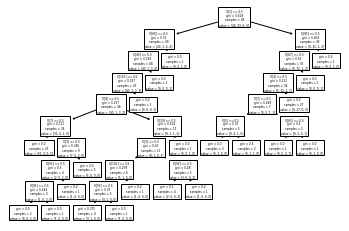

In [24]:
tree.plot_tree(clf_dt.fit(X_test_sf_encoded, y_test))
clf_dt_test_scores = train_model(clf_dt, X_test_sf_encoded, y_test)
print(clf_dt_test_scores)

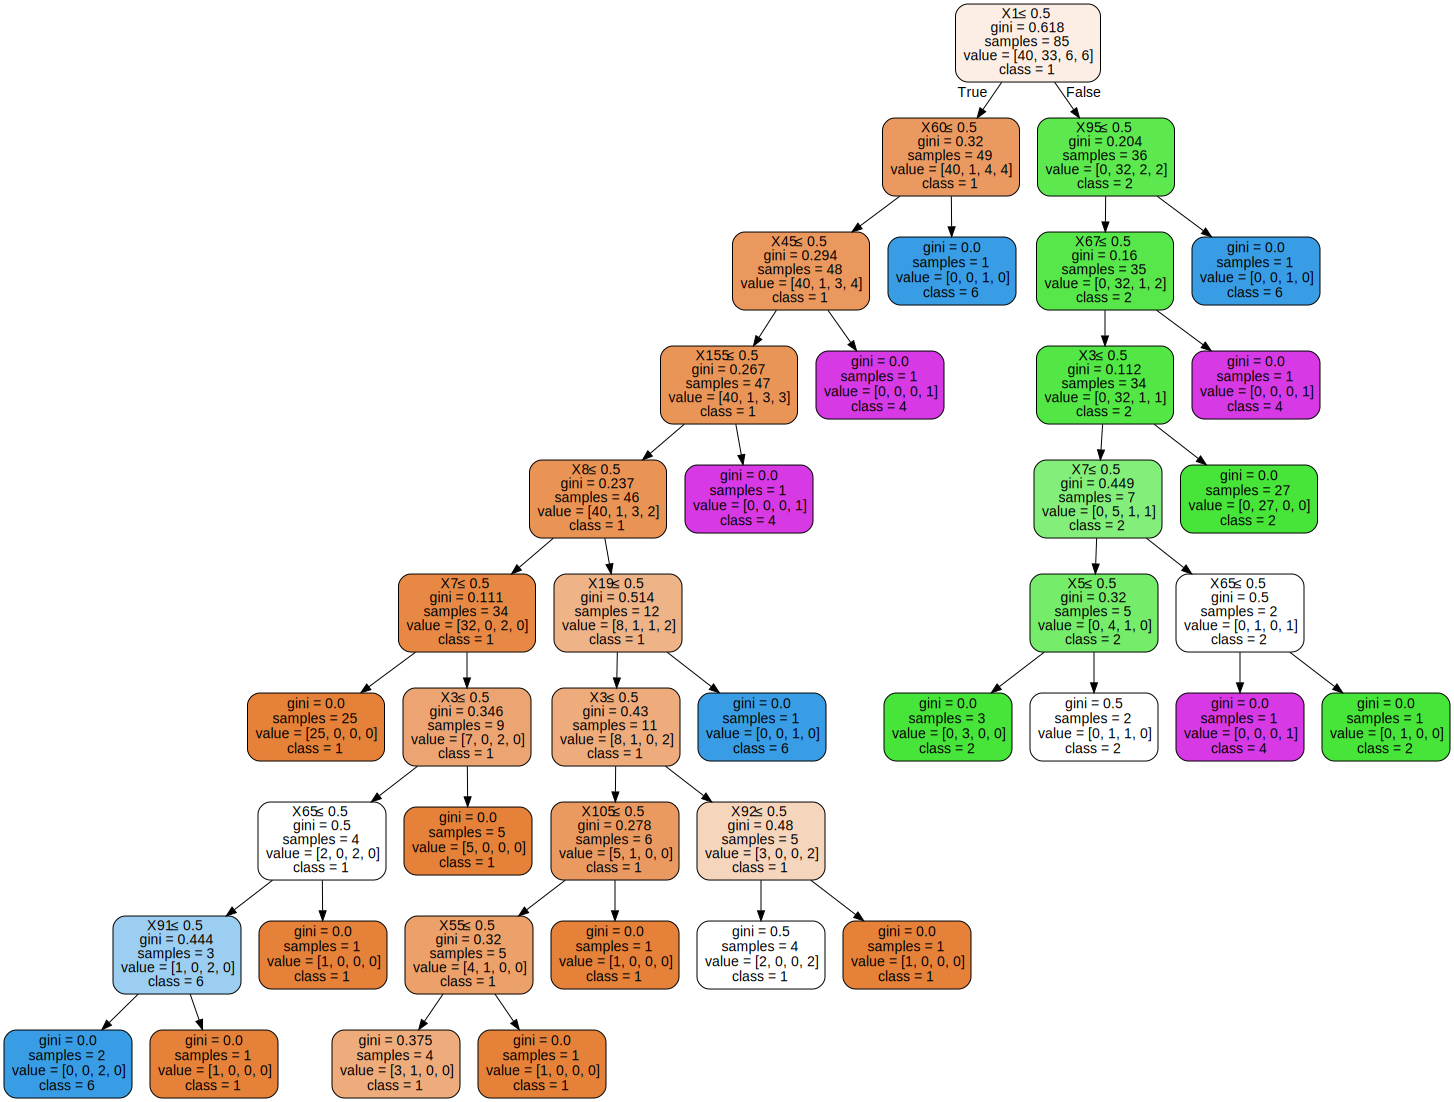

In [15]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                  feature_names=None,  
                      class_names=targets,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [16]:
clf_dtr = tree.DecisionTreeRegressor(random_state=1, max_depth=None)

In [17]:
X2 = pd.read_csv("interstate.csv")
y2 = X2.pop("combat_fatalities").values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state=1)
featureSet2 = ['side', 'initiation','combat_location','outcome']
X_train_sf2 = X_train2[featureSet2].copy()
X_test_sf2 = X_test2[featureSet2].copy()
ohe.fit(X_train_sf2)
X_train_sf_encoded2 = ohe.transform(X_train_sf2)
X_test_sf_encoded2 = ohe.transform(X_test_sf2)

In [25]:
clf_dtr_scores = train_model(clf_dtr, X_train_sf_encoded2, y_train2)
print(clf_dtr_scores)

Starting training...
Epoch:1/10 -- 2019-12-02 13:03:17.438682
Epoch:2/10 -- 2019-12-02 13:03:17.440696
Epoch:3/10 -- 2019-12-02 13:03:17.443661
Epoch:4/10 -- 2019-12-02 13:03:17.445655
Epoch:5/10 -- 2019-12-02 13:03:17.448648
Epoch:6/10 -- 2019-12-02 13:03:17.449664
Epoch:7/10 -- 2019-12-02 13:03:17.451640
Epoch:8/10 -- 2019-12-02 13:03:17.453655
Epoch:9/10 -- 2019-12-02 13:03:17.455630
Epoch:10/10 -- 2019-12-02 13:03:17.456625
Done training.
[0.9728588265790242, 0.9728588265790242, 0.9728588265790242, 0.9728588265790242, 0.9728588265790242, 0.9728588265790242, 0.9728588265790242, 0.9728588265790242, 0.9728588265790242, 0.9728588265790242]


In [19]:
y_predicted2 = clf_dtr.predict(X_train_sf_encoded2[0:10])
print(y_predicted2)

[5.94297857e+04 1.00000000e+02 3.28125000e+04 6.11160625e+04
 4.05400000e+05 9.78166667e+03 4.29450000e+03 1.41221667e+04
 6.11160625e+04 2.44833333e+04]


Starting training...
Epoch:1/10 -- 2019-12-02 13:03:39.365518
Epoch:2/10 -- 2019-12-02 13:03:39.367525
Epoch:3/10 -- 2019-12-02 13:03:39.368524
Epoch:4/10 -- 2019-12-02 13:03:39.370505
Epoch:5/10 -- 2019-12-02 13:03:39.371476
Epoch:6/10 -- 2019-12-02 13:03:39.372516
Epoch:7/10 -- 2019-12-02 13:03:39.374493
Epoch:8/10 -- 2019-12-02 13:03:39.375491
Epoch:9/10 -- 2019-12-02 13:03:39.376488
Epoch:10/10 -- 2019-12-02 13:03:39.377486
Done training.
[0.8694522521258465, 0.8694522521258465, 0.8694522521258465, 0.8694522521258465, 0.8694522521258465, 0.8694522521258465, 0.8694522521258465, 0.8694522521258465, 0.8694522521258465, 0.8694522521258465]


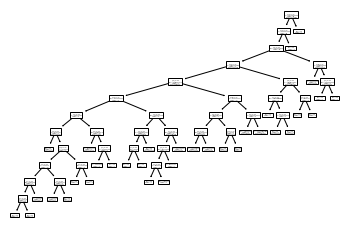

In [26]:
tree.plot_tree(clf_dtr.fit(X_test_sf_encoded2, y_test2))
clf_dtr_test_scores = train_model(clf_dtr, X_test_sf_encoded2, y_test2)
print(clf_dtr_test_scores)

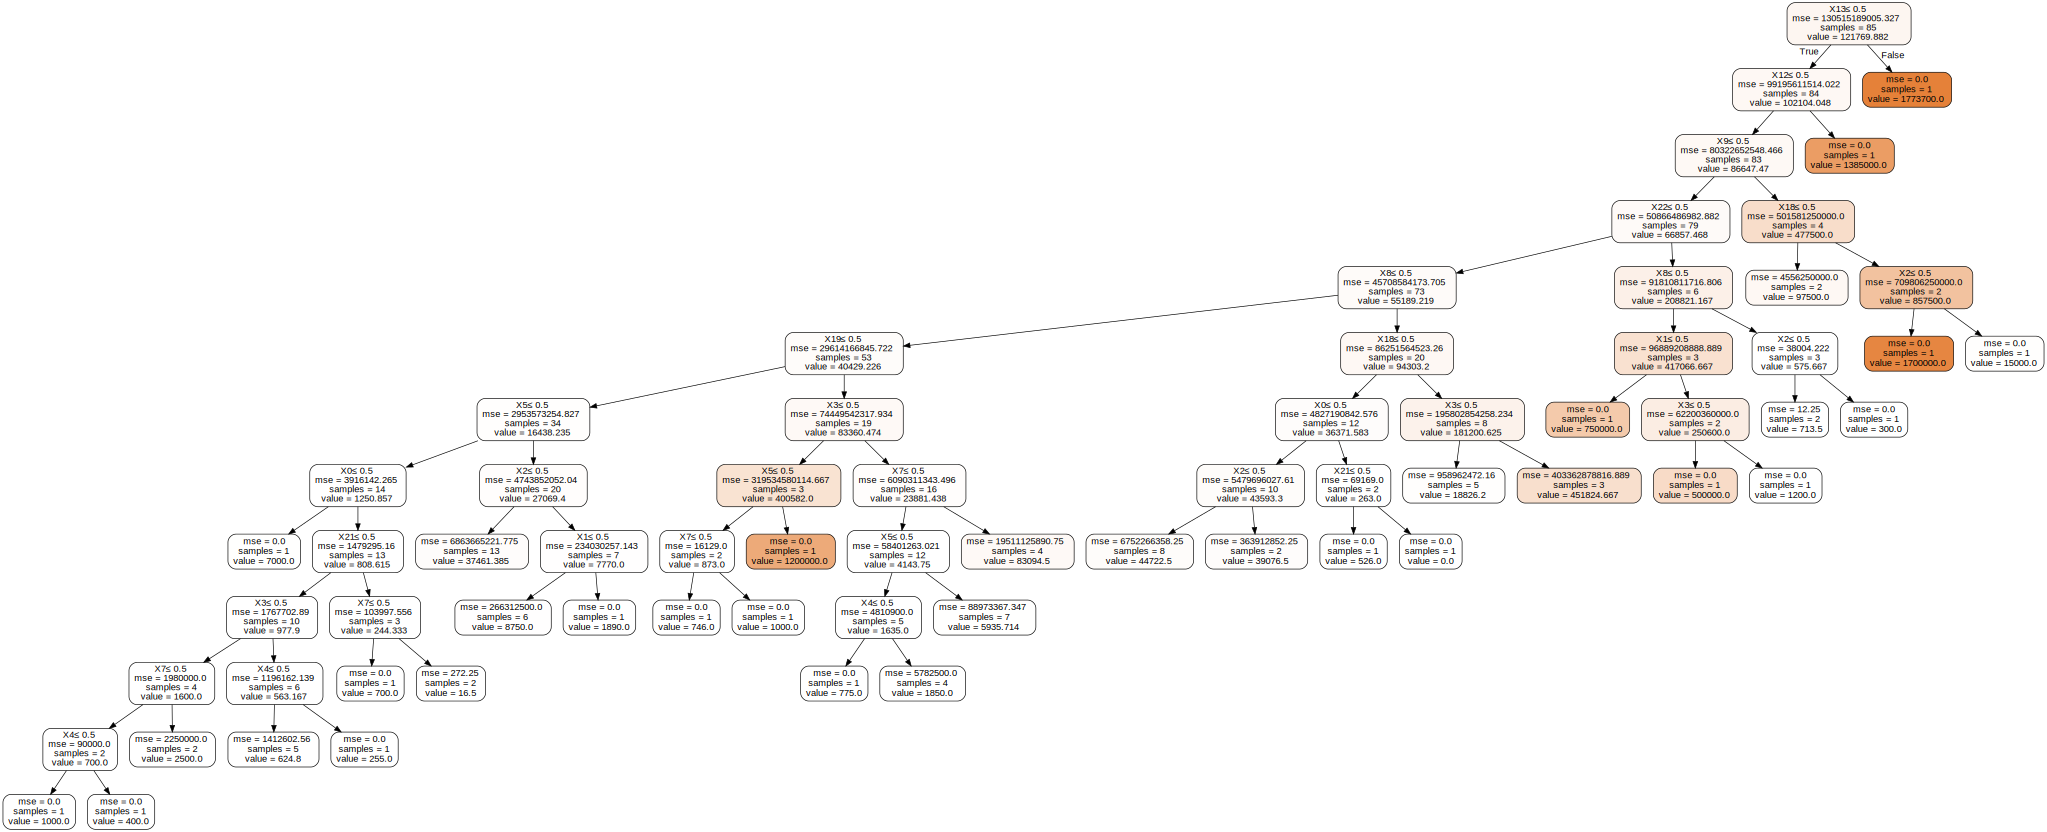

In [21]:
dot_data2 = tree.export_graphviz(clf_dtr, out_file=None, 
                  feature_names=None,  
                      class_names=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph2 = graphviz.Source(dot_data2)  
graph2 

In [34]:
def plotScores(scores_train, scores_test):
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    plt.legend(["Train scores", "Test Scores"])
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

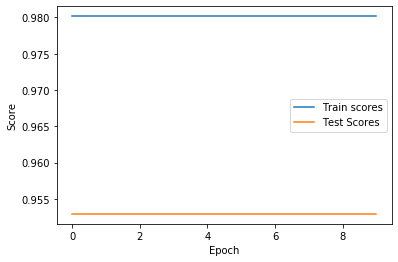

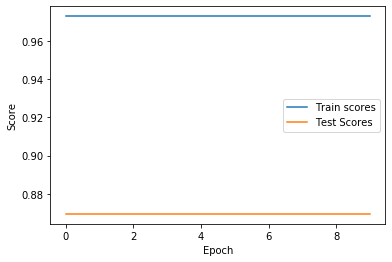

In [36]:
plotScores(clf_dt_scores, clf_dt_test_scores)
plotScores(clf_dtr_scores, clf_dtr_test_scores)